In [33]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cars = pd.read_csv('data/car_data.csv')
#display(cars.info)

print(cars.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car_name'],
      dtype='object')


Null Hypothesis: MPG neither increases or decreases by weight of the vehicle
Alt Hypo: MPG increases/ decreases with weight of the vehicle 

Correlation between MPG and Weight: -0.8317409332443351


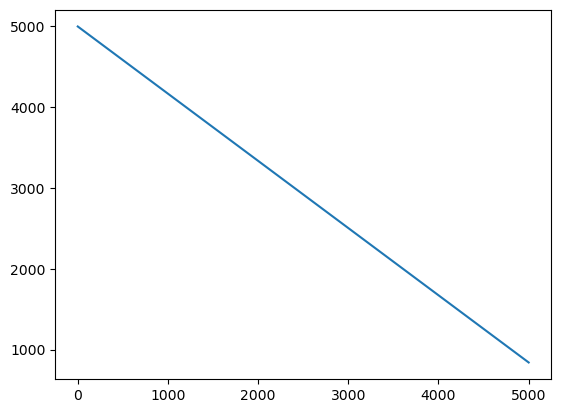

In [22]:
correlation = cars['mpg'].corr(cars['weight'])
print("Correlation between MPG and Weight:", correlation)

x = np.linspace(0, 5000, 5000)
plt.plot(x, correlation*x+5000)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


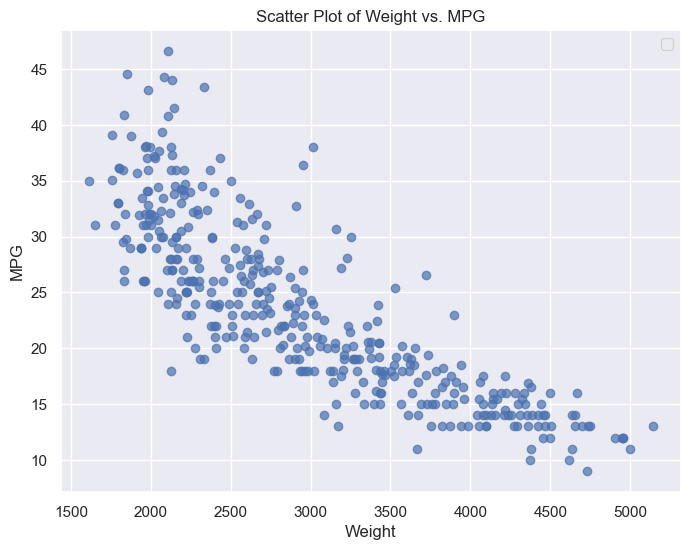

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(cars['weight'], cars['mpg'], alpha=0.7)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Scatter Plot of Weight vs. MPG')
#plt.grid(True)
#plt.plot(x, correlation*x+500)
plt.legend()
plt.show()

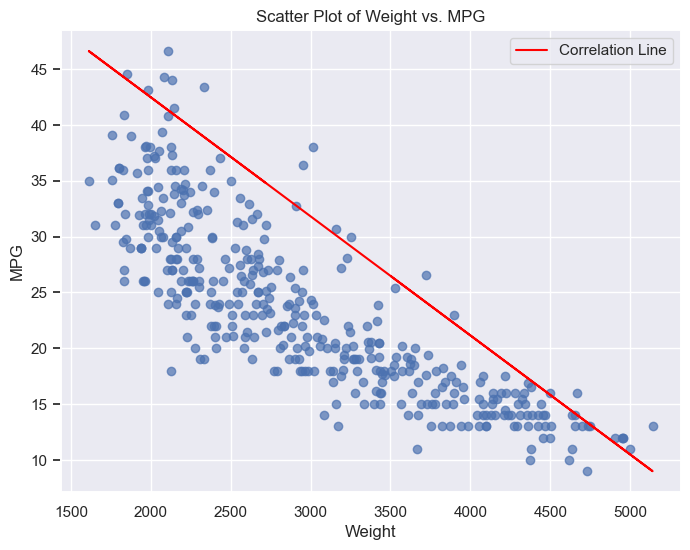

In [45]:
correlation = cars['mpg'].corr(cars['weight'])
sns.set_theme()
plt.figure(figsize=(8, 6))
ax1 = plt.gca()

# scatter
ax1.scatter(cars['weight'], cars['mpg'], alpha=0.7)
ax1.set_xlabel('Weight')
ax1.set_ylabel('MPG')
ax1.set_title('Scatter Plot of Weight vs. MPG')
#ax1.grid(True)

# corr line on separate scale
ax2 = ax1.twinx()
ax2.plot(cars['weight'], cars['weight'] * correlation, color='red', label='Correlation Line')
ax2.grid(False)
ax2.set_yticks([])

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()


In [31]:
t = stats.ttest_ind(cars['mpg'], cars['weight'],
    equal_var=False, # Welch's
    alternative='two-sided')
print(t)

Ttest_indResult(statistic=-69.42048534934622, pvalue=3.6317583378490467e-224)
